# Credit Card Fraud Detection dataset

> ***here,*** 

***Total Records: 284,807 transactions***

***Fraudulent Transactions: 492 (≈ 0.172%)***

***Normal Transactions: 284,315***

***Duration Covered: 2 days***

***Class: 	Target variable: 0 = Not Fraud, 1 = Fraud***

***thus Class is heavily imbalanced: only 0.172% of the entries are frauds.***

# EDA(Explanatory Data Analysis)

In [ ]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0 --force-reinstall --quiet

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
 df.isnull().sum()
### no null values present if few null we can drop it using df.dropna as the dataset is large enough

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.duplicated().sum()

1081

There are 1081 rows in your dataset that are exact duplicates of previous rows.

In [5]:
df = df.drop_duplicates()
df.shape

(283726, 31)

In [6]:
df.dtypes
# only Class is interger and there is no string value

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
## Class Distribution
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [9]:
df.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      283253.0  94835.058093  47475.550607    0.0  54233.0  84711.0   
1         473.0  80450.513742  48636.179973  406.0  41203.0  73408.0   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139308.0  172792.0  283253.0  0.013439  ...  0.077961  33.847808   
1      129095.0  170348.0     473.0 -4.498280  ...  0.372393   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      283253.0   88.413575  250.379023  0.0  5.67  22.00   77.46  25691.16  
1         473.0  123.871860  260.211041  0.0  1.00   9.82  105.89   2125.87  

[2 rows x 240 columns]

In [10]:
# Sum of transaction Amount by class:
df.groupby('Class')['Amount'].sum()


Class
0    25043410.29
1       58591.39
Name: Amount, dtype: float64

# DataVisualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


## as fruad is only 473 we need 

# Count values and calculate total
class_counts = df['Class'].value_counts()
total = class_counts.sum()

# Class label map for better readability
class_labels = {0: "Normal", 1: "Fraud"}
df['ClassLabel'] = df['Class'].map(class_labels)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,ClassLabel
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Normal
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,Normal
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,Normal
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,Normal
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,Normal


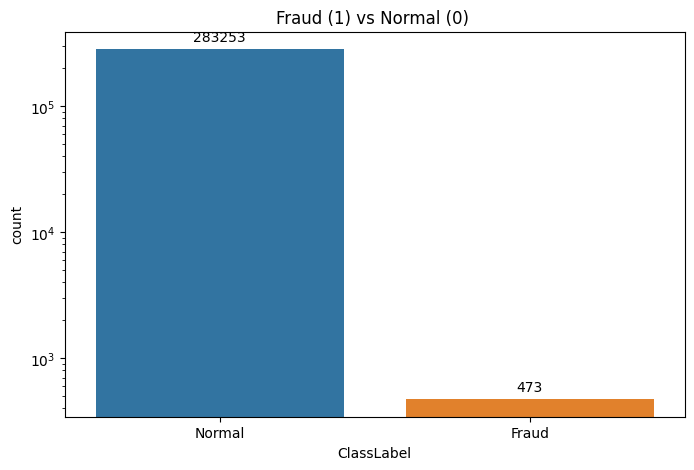

In [12]:
# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='ClassLabel', data=df) ######
plt.yscale('log')  # Set y-axis to log scale

# Add count annotations on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., count * 1.1,
            f'{count}', ha="center", va="bottom")

plt.title('Fraud (1) vs Normal (0) ')

plt.show()

In [13]:
df.drop(columns=['ClassLabel'], inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


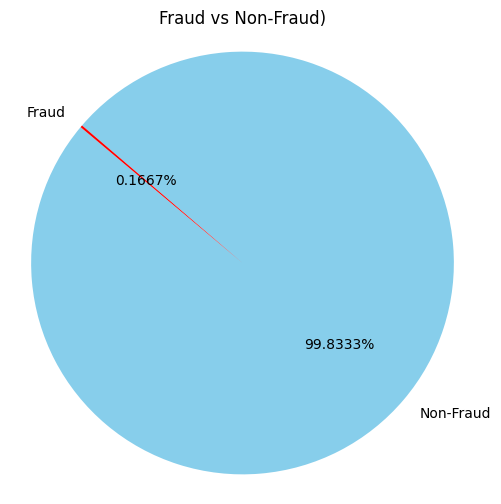

In [14]:
plt.figure(figsize=(6, 6))
labels = ['Non-Fraud', 'Fraud']
plt.pie(class_counts, labels=labels, autopct='%1.4f%%', colors=['skyblue', 'red'], startangle=140)
plt.title('Fraud vs Non-Fraud)')
plt.axis('equal')
plt.show()


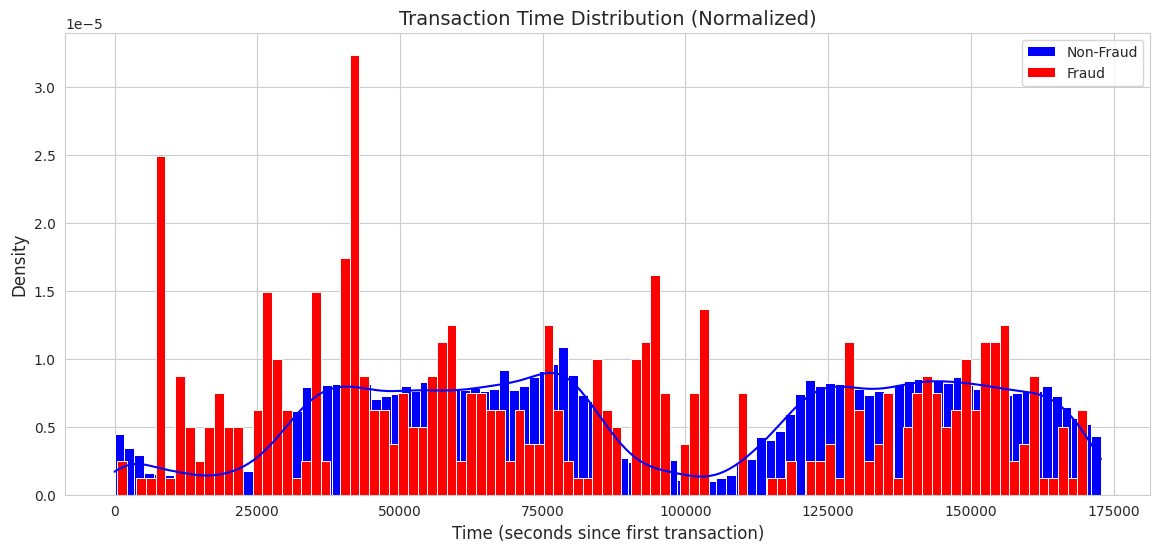

In [15]:
# Transaction Amount Distribution

sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

sns.histplot(df[df['Class'] == 0]['Time'], 
             bins=100, 
             color='blue', 
             label='Non-Fraud', 
             stat='density',  # density to normalize
                 kde=True, # Smooth Curve
             alpha=1.0   
            )

sns.histplot(df[df['Class'] == 1]['Time'], 
             bins=100, 
             color='red', 
             label='Fraud', 
             stat='density', 
             kde=False,   
             alpha=1.0     
        )


plt.title('Transaction Time Distribution (Normalized)', fontsize=14)
plt.xlabel('Time (seconds since first transaction)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

plt.show()


***Around 0–50,000 seconds, fraud activity is relatively high***
***Fraud density drops in some middle ranges, then rises again near the end***

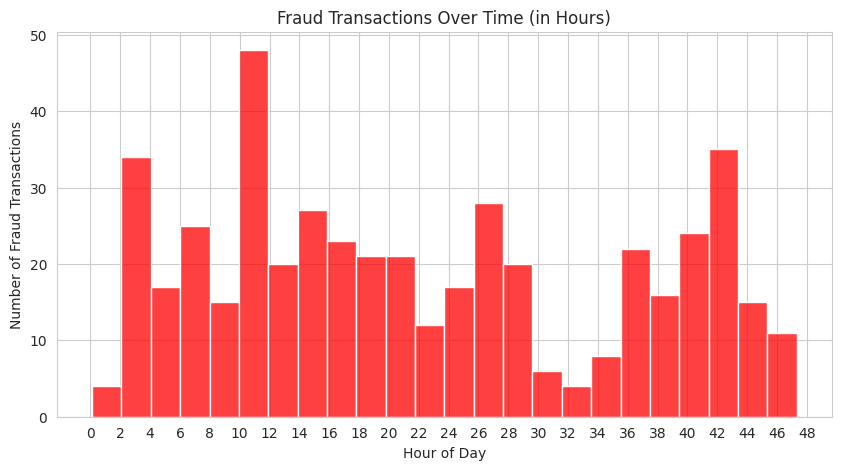

In [16]:
fraud_df = df[df['Class'] == 1]

#  Histogram of fraud times (in hours)
fraud_df['Hour'] = fraud_df['Time'] / 3600  # Convert seconds to hours

plt.figure(figsize=(10, 5))
sns.histplot(fraud_df['Hour'], bins=24, kde=False, color='red')
plt.title("Fraud Transactions Over Time (in Hours)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Fraud Transactions")
plt.xticks(range(0, 49, 2))
plt.grid(True)
plt.show()


***across the ~48-hour period covered in the dataset. Fraud spikes around hour 10–12, 26, and 42***

***Correlation Matrix***

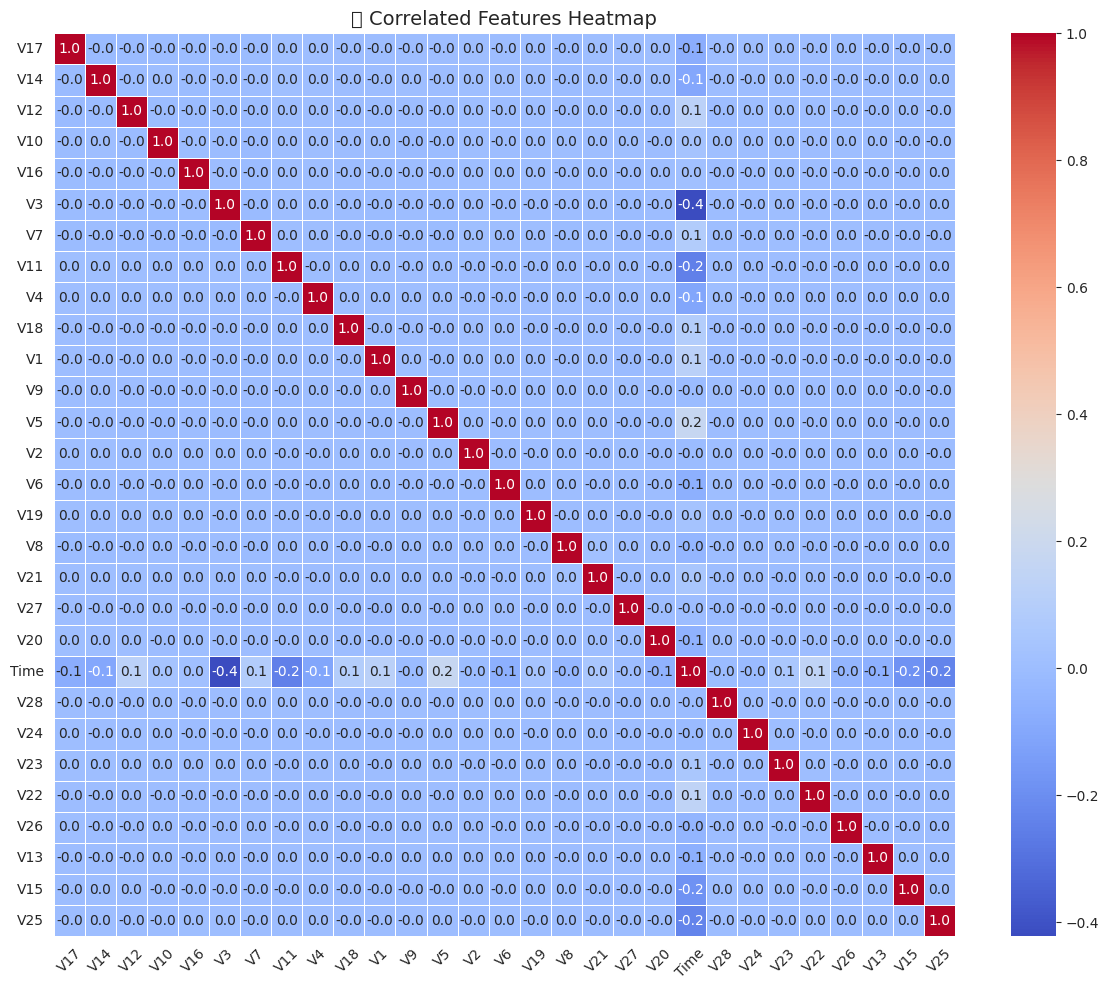

In [17]:

# Correlation matrix
corr_matrix = df.corr()

top_corr_features = corr_matrix['Class'].abs().sort_values(ascending=False)
top_corr_features = top_corr_features.drop(['Class', 'Amount'])


plt.figure(figsize=(12, 10))
sns.heatmap(df[top_corr_features.index].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".1f", 
            linewidths=0.5)

plt.title("🔥 Correlated Features Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

***thus PCA V1-V28 along with the time are uncorrelated***

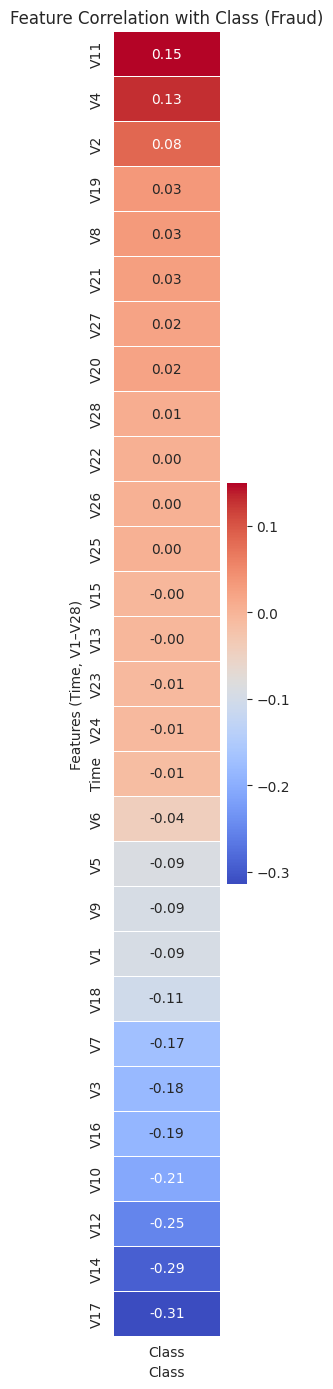

In [18]:
# correlation matrix
corr_matrix = df.corr()

# Remove 'Amount' and 'Class' from y-axis, keep only 'Class' as column
corr_with_class = corr_matrix[['Class']].drop(index=['Amount', 'Class'])

# Plot vertical heatmap
plt.figure(figsize=(2.5, 14))  # Narrow width, tall height
sns.heatmap(corr_with_class.sort_values(by='Class', ascending=False), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            cbar=True)

plt.title("Feature Correlation with Class (Fraud)", fontsize=12)
plt.xlabel("Class")
plt.ylabel("Features (Time, V1–V28)")
plt.tight_layout()
plt.show()


***V11, V4, V2 might indicate suspicious transaction behavior when their values rise.***

In [81]:
correlation = df.corr()['Class'].drop('Class').sort_values(ascending=False)
print(correlation.head(10))  # Top positively correlated
print(correlation.tail(10))  # Top negatively correlated


V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
Name: Class, dtype: float64
V9    -0.094021
V1    -0.094486
V18   -0.105340
V7    -0.172347
V3    -0.182322
V16   -0.187186
V10   -0.206971
V12   -0.250711
V14   -0.293375
V17   -0.313498
Name: Class, dtype: float64


***Top Positively Correlated:***
***V11, V4, V2, V19, V8, V21, V27, V20, V28***

***Top Negatively Correlated:***
***V17, V14, V12, V10, V16, V7, V3, V18, V1***

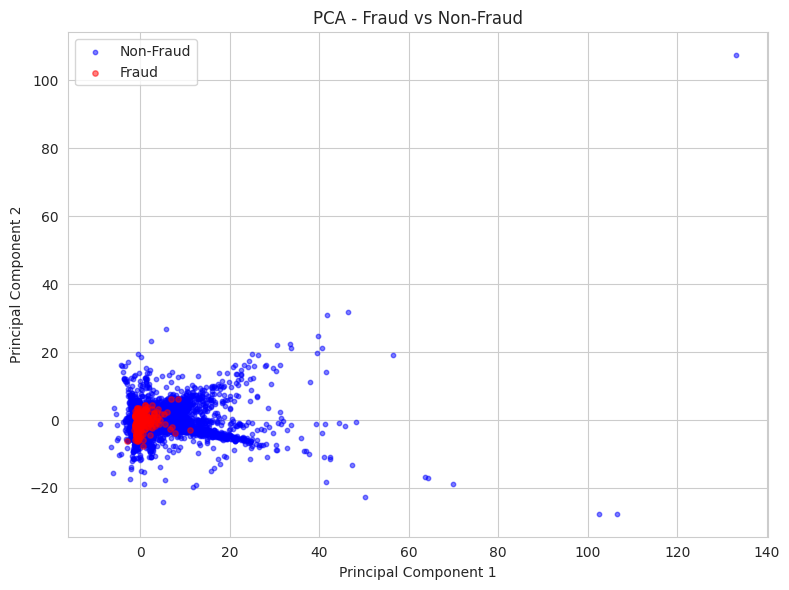

In [19]:
# PCA (Principal Component Analysis) reduceing  this high-dimensional space 28 PCA features (V1–V28) to 2 dimensions:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = [col for col in df.columns if col not in ['Class', 'Time']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Color based on fraud class
labels = df['Class']

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[labels == 0, 0], X_pca[labels == 0, 1], 
            alpha=0.5, label='Non-Fraud', c='blue', s=10)
plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1], 
            alpha=0.5, label='Fraud', c='red', s=15)

plt.title("PCA - Fraud vs Non-Fraud")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


***>Fraud points are more concentrated in specific zones***
***> Non-fraud is spread more broadly***

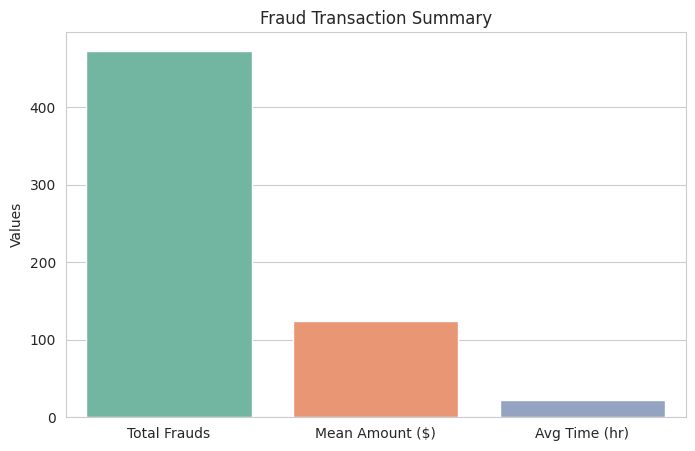

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter fraud transactions
fraud_df = df[df['Class'] == 1]

# Observation metrics
total_frauds = len(fraud_df)
mean_amount = fraud_df['Amount'].mean()
mean_hour = fraud_df['Time'].mean() / 3600  # convert seconds to hours

# 📊 Bar Plot for summary stats
plt.figure(figsize=(8, 5))
sns.barplot(x=["Total Frauds", "Mean Amount ($)", "Avg Time (hr)"], 
            y=[total_frauds, mean_amount, mean_hour], palette="Set2")
plt.title("Fraud Transaction Summary")
plt.ylabel("Values")
plt.show()


#  Observations

In [38]:
fraud_df = df[df['Class'] == 1]
print("\n--- Observations on Fraud Transactions ---")
print(f"Total frauds: {len(fraud_df)}")
print(f"Mean amount of frauds $: {fraud_df['Amount'].mean():.2f}")
print(f"Fraud transactions are most common during: {fraud_df['Time'].mean()/3600:.2f} hours since day start")


--- Observations on Fraud Transactions ---
Total frauds: 473
Mean amount of frauds $: 123.87
Fraud transactions are most common during: 22.35 hours since day start


***Since  fraud class is rare (~0.17%).  the most important metrics are those that properly evaluate model performance on imbalanced datasets***

***AUPRC (PR-AUC) ==   evaluates precision & recall trade-off for fraud class.Good Balance and best for ranking fraud predictions***

***Recall == focus on True Negetive more ensuring proper detection of Fradulent case***

***Precision == avaoiding False alarms by minimizing the false postive***


In [39]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Just Model Training

***Logistic Regression***

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             precision_recall_curve, roc_auc_score, auc, f1_score,
                             precision_score, recall_score)

In [116]:
# 1. Features and Labels
X = df.drop(columns=["Class", "Time"])
y = df["Class"]

# 2. Scaling 'Amount'
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

# 3. Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape

(226980, 29)

In [117]:

# 4. Model Training (weighted)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 6. Metrics
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# 7. Report
print("=== Evaluation Metrics ===")
print(f"AUPRC (Precision-Recall AUC): {pr_auc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



=== Evaluation Metrics ===
AUPRC (Precision-Recall AUC): 0.7049
ROC-AUC: 0.9648
F1 Score: 0.1049
Precision: 0.0558
Recall: 0.8737

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix


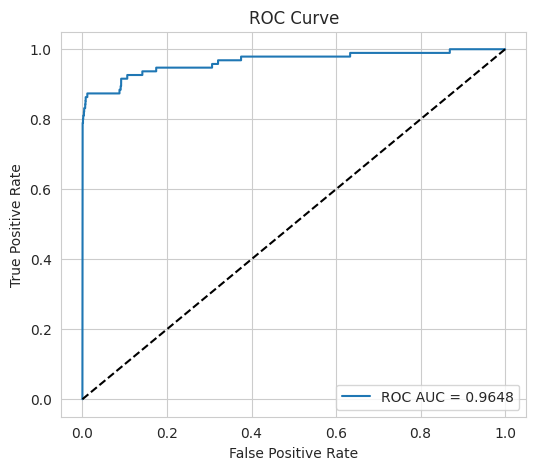

In [119]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


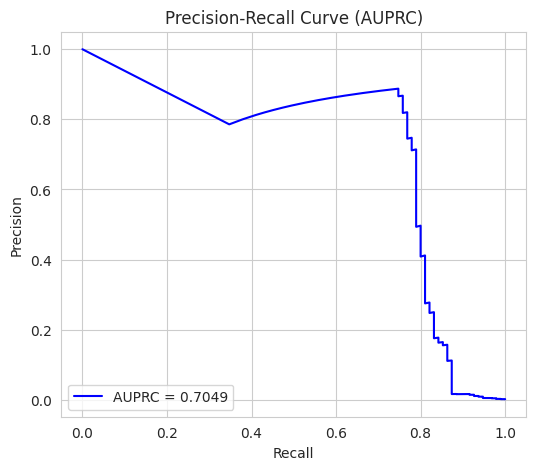

In [120]:
# Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"AUPRC = {pr_auc:.4f}", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (AUPRC)")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


***average trade-off between precision and recall***

# More Model Selection

In [109]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

***with only model tunning***

In [47]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if y_prob is not None:
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)
    else:
        pr_auc = float('nan')  # For models like SVM if probability is disabled

    results.append({
        'Model': name,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'AUPRC': pr_auc
    })

# as table

results_df = pd.DataFrame(results).sort_values(by='AUPRC', ascending=False)
# Display the results using plain pandas
print("\n=== Model Evaluation Results (sorted by AUPRC) ===")
print(results_df)




 Training Logistic Regression...

 Training Random Forest...

 Training XGBoost...

 Training Support Vector Machine...

 Training K-Nearest Neighbors...

=== Model Evaluation Results (sorted by AUPRC) ===
                    Model    Recall  Precision  F1 Score     AUPRC
2                 XGBoost  0.768421   0.901235  0.829545  0.834212
1           Random Forest  0.747368   0.934211  0.830409  0.811567
0     Logistic Regression  0.642105   0.859155  0.734940  0.632105
4     K-Nearest Neighbors  0.010526   1.000000  0.020833  0.144922
3  Support Vector Machine  0.000000   0.000000  0.000000  0.001668


***using class_weight='balanced'***

 *class_weight='balanced' tells the model to automatically adjust weights inversely proportional to class frequencies, helping the model treat rare classes (frauds) more seriously*

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# Models to test, no hyperparameters 
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier()
}

# Cross validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

print("~ Mean Precision Score ~")

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv = cv, scoring = "average_precision")
    print(f'{name}: {scores.mean():.4f}')

~ Mean Precision Score ~
Logistic Regression: 0.6909
Random Forest: 0.8299
XGBoost: 0.8403


***Before doing any real hyperparameter tuining, it looks like XGBoost performs the best.***

***Using only the Top Important (18) Features***
***From  heatmap & correlation output, we can select the most relevant features.***

***Top Positively Correlated:***
***V11, V4, V2, V19, V8, V21, V27, V20, V28***

***Top Negatively Correlated:
V17, V14, V12, V10, V16, V7, V3, V18, V1***

In [82]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_recall_curve,
    roc_auc_score, auc, f1_score, precision_score, recall_score
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Step 1: Load and Select Important Features
important_features = [
    'V11', 'V4', 'V2', 'V19', 'V8', 'V21', 'V27', 'V20', 'V28',
    'V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V3', 'V18', 'V1',
    'Amount'  # Keep amount as it's meaningful and not PCA'd
]

X = df[important_features]
y = df["Class"]

# Step 2: Scaling 'Amount'
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

# Step 3: Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Train Models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Step 5: Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    # Report
    print(f"\n=== Evaluation Metrics: {name} ===")
    print(f"AUPRC (Precision-Recall AUC): {pr_auc:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



=== Evaluation Metrics: Random Forest ===
AUPRC (Precision-Recall AUC): 0.8213
ROC-AUC: 0.9404
F1 Score: 0.8313
Precision: 0.9718
Recall: 0.7263

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746


=== Evaluation Metrics: XGBoost ===
AUPRC (Precision-Recall AUC): 0.8262
ROC-AUC: 0.9711
F1 Score: 0.8353
Precision: 0.9467
Recall: 0.7474

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.75      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



# Using Smote

***Logistic Regression***

Before SMOTE: 378 fraud samples
After SMOTE: 226602 fraud samples

=== Evaluation Metrics with SMOTE ===
AUPRC (Precision-Recall AUC): 0.7147
ROC-AUC: 0.9605
F1 Score: 0.1008
Precision: 0.0535
Recall: 0.8737

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



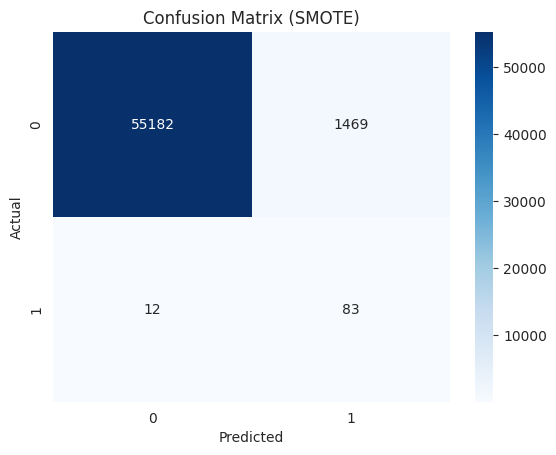

In [25]:

from imblearn.over_sampling import SMOTE


# Apply SMOTE on training set
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", sum(y_train==1), "fraud samples")
print("After SMOTE:", sum(y_train_smote==1), "fraud samples")

#  Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

#  Predict and Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Metrics
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

#  Print Metrics
print("\n=== Evaluation Metrics with SMOTE ===")
print(f"AUPRC (Precision-Recall AUC): {pr_auc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



***Smote with xgboost***

=== Evaluation Metrics ===
AUPRC (Precision-Recall AUC): 0.8084
ROC-AUC: 0.9713
F1 Score: 0.7692
Precision: 0.7500
Recall: 0.7895

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.75      0.79      0.77        95

    accuracy                           1.00     56746
   macro avg       0.87      0.89      0.88     56746
weighted avg       1.00      1.00      1.00     56746



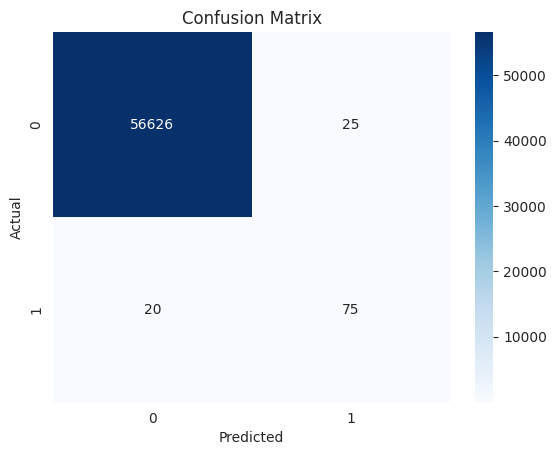

In [26]:

from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline

# Modeling

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


# Create Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

#  Train the model
pipeline.fit(X_train, y_train)

# Step 10: Predict
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print Results
print("=== Evaluation Metrics ===")
print(f"AUPRC (Precision-Recall AUC): {pr_auc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



***Smote with xgboost and choosing the best parameter***

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=  12.1s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=  15.1s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=  15.7s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=  15.6s
[CV] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=  11.7s
[CV] END classifier__colsample_bytree=1.0, classifier__learning_

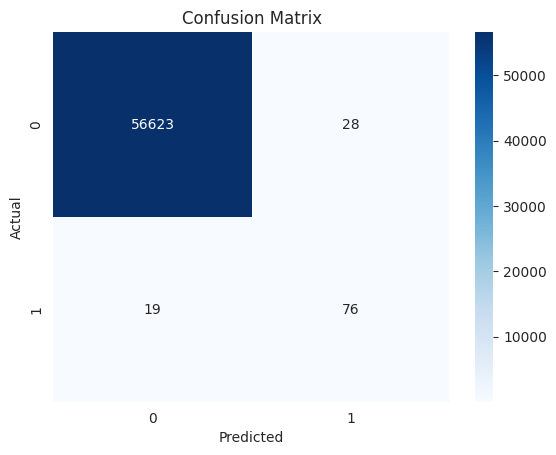

In [27]:

from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    scoring='average_precision',  # AUPRC is better for imbalance
    cv=3,
    verbose=2,
    n_iter=10,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Best pipeline
best_model = search.best_estimator_
print('##############################################')
print('Best Parameter selection is: ',best_model)
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]



# Step 11: Evaluation
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Step 12: Print Results
print("=== Evaluation Metrics ===")
print(f"AUPRC (Precision-Recall AUC): {pr_auc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Step 13: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


***changing Scaler***

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   9.4s
[CV] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   9.5s
[CV] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   9.7s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=  11.8s
[CV] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   7.3s
[CV] END classifier__colsample_bytree=1.0, classifier__learning

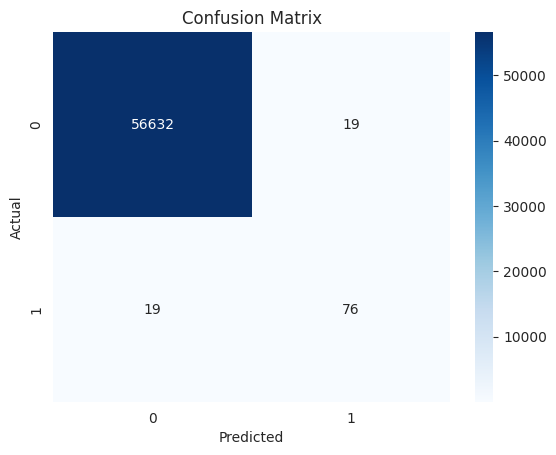

In [29]:

from sklearn.preprocessing import MinMaxScaler


#  Features and Labels
X = df.drop(columns=['Class'])
y = df['Class']

#  Scale Time & Amount
scaler = MinMaxScaler(feature_range=(0,1))
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount','Time']])

# Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    scoring='average_precision',  # AUPRC is better for imbalance
    cv=3,
    verbose=2,
    n_iter=10,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Best pipeline
best_model = search.best_estimator_
print('##############################################')
print('Best Parameter selection is: ',best_model)

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]



# Evaluation
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

#  Print Results
print("=== Evaluation Metrics ===")
print(f"AUPRC (Precision-Recall AUC): {pr_auc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))




# UnderSampling

In [90]:
# df= df.drop(['Time'],axis = 1)
normal = df[df['Class']== 0 ]
fraud = df[df['Class'] == 1]

In [91]:
normal.shape

(283253, 31)

In [92]:
fraud.shape

(473, 31)

In [93]:
normal_sample = normal.sample(n = 473)
normal_sample.shape

(473, 31)

In [94]:
new_df = pd.concat([normal_sample,fraud],ignore_index = True)

In [95]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [96]:
x = new_df.drop('Class',axis = 1)
y = new_df['Class']

In [103]:
#  spliting the training data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20 ,random_state = 101)

In [104]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=44)
# Train the model
rf_model.fit(x_train, y_train)
# Predict on the test set
y_pred1 = rf_model.predict(x_test)

In [105]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score,roc_curve, auc


# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

#  Evaluate core metrics
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1}")



y_pred1 = rf_model.predict(x_test)
auprc = average_precision_score(y_test, y_pred1)
print(f"AUPRC (Area Under Precision-Recall Curve) = {auprc:.4f}")



Accuracy: 0.95
Precision = 0.9775280898876404
Recall = 0.9157894736842105
F1 Score = 0.9456521739130435
AUPRC (Area Under Precision-Recall Curve) = 0.9373


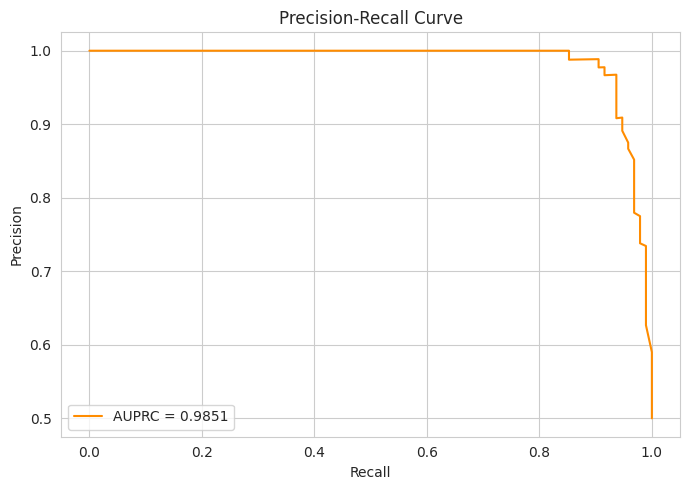

In [106]:

y_pred1 = rf_model.predict_proba(x_test)[:, 1]  # Probabilities for class 1

# === 1. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred1)
pr_auc = average_precision_score(y_test, y_pred1)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"AUPRC = {pr_auc:.4f}", color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***here, X-axis = Recall: How many actual frauds did the model catch?***

***Y-axis = Precision: Of the frauds the model predicted, how many were actually fraud?***

***AUPRC (Area Under PR Curve)==Excellent! Near-perfect fraud detection ranking ability***

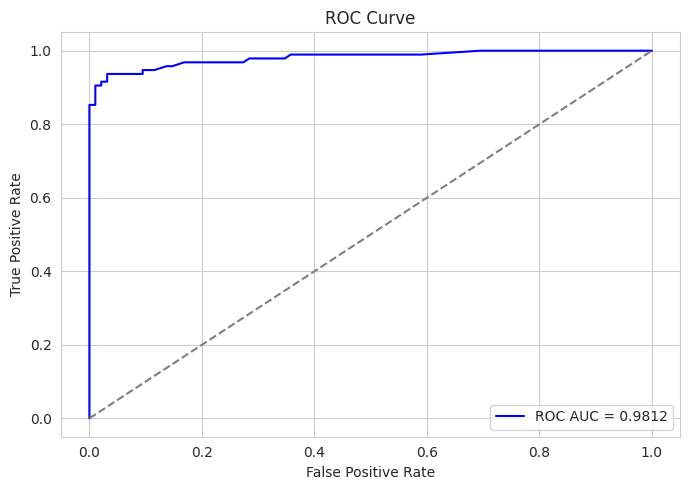

In [107]:
# === 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***here, X-axis = False Positive Rate (non-fraud predicted as fraud)***

***Y-axis = True Positive Rate (Recall)***

***ROC AUC == Excellently separates frauds from non-frauds, regardless of class imbalance.***


In [75]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=44)

# Train the model
gb_model.fit(x_train, y_train)

# Predict on the test set
y_pred2 = gb_model.predict(x_test)


from sklearn.metrics import accuracy_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1}")


y_pred2 = gb_model.predict(x_test)
auprc = average_precision_score(y_test, y_pred2)
print(f"AUPRC (Area Under Precision-Recall Curve) = {auprc:.4f}")

Accuracy: 0.94
Precision = 0.9560439560439561
Recall = 0.9157894736842105
F1 Score = 0.935483870967742
AUPRC (Area Under Precision-Recall Curve) = 0.9176


In [76]:
m_accuracy = pd.DataFrame({'Models':['Random Forest','Gradient Boosting'],
             "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                         accuracy_score(y_test,y_pred2)*100
                        ]})
m_accuracy

,Models,Accuracy
0,Random Forest,94.210526
1,Gradient Boosting,93.684211
